In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
base_path = 'F:\Study\weiboPredict\data'

origin = pd.read_csv(base_path+'\\samples\\origin_train_tt.csv',
                     sep='\001',
                     encoding='utf-8',
                     index_col='w_id',
                     quoting=3)
repo = pd.read_csv(base_path+'\\samples\\repo_train_tt.csv',
                    sep='\001',
                    encoding='utf-8',
                    quoting=3).fillna(value='', axis=1)
print('origin: ', len(origin), '\n', 'repo: ', len(repo))

# 只取datetime中的time
origin.time = [t.time() for t in pd.to_datetime(origin.time)]

Populating the interactive namespace from numpy and matplotlib


origin:  16640 
 repo:  9264100


count    16640.000000
mean       556.736779
std        399.618508
min         75.000000
25%        193.000000
50%        416.000000
75%        922.000000
max       1506.000000
Name: repo_num_1w, dtype: float64

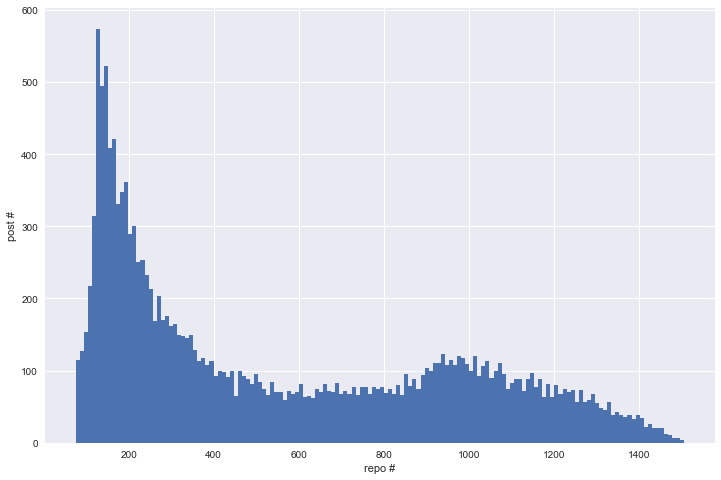

In [5]:
plt.clf()
fig = plt.figure(figsize=(12.0, 8.0))  # create a new figure
origin.repo_num_1w.hist(bins=150)
ax = fig.gca()  
ax.set_xlabel("repo #")
ax.set_ylabel("post #")
origin.repo_num_1w.describe()

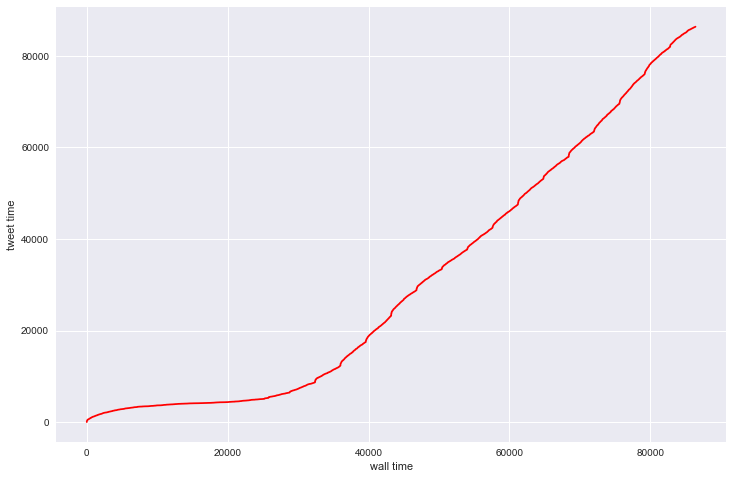

In [7]:
# 计算Tweet time tt
Nt = np.zeros(86400)
for t in origin.time:
    Nt[t.hour*3600 + t.minute*60 + t.second:]+=1
tt = Nt*86400 / origin.shape[0]
plt.clf()  # clear the plot
fig = plt.figure(figsize=(12.0, 8.0))  # create a new figure
ax = fig.gca()  

ax.set_xlabel("wall time")
ax.set_ylabel("tweet time")
plt.plot(range(86400), tt, 'r-')
plt.show()

In [1]:
# 将单条原微博转发记录的转发时间转换为tweet time度量
def arrive_tt(repos,origin,tt):
    
    # 得到其发布时间
    post_time=origin.loc[repos['w_id'].iloc[0]].time
    # 换算为秒
    post_time_s = post_time.hour*3600 + post_time.minute*60 + post_time.second
    # 得到对应的tweet time T(t)
    post_tt = tt[post_time_s]
    
    # 计算每条转发的tweet time
    repos.loc[:, 'repo_tt'] = tt[(repos['arrive_wt'] + post_time_s) % 86400]
    # 计算每条转发与原博发布之间的 tweet time
    repos.loc[:, 'arrive_tt'] = ((post_time_s + repos['arrive_wt']) / 86400).astype(int)*86400 + repos['repo_tt'] - post_tt
    repos = repos.sort_values('arrive_wt')
    return repos

In [2]:
def post_tt(item,tt):
     
     # 得到其发布时间
    post_time=item.time
    # 换算为秒
    post_time_s = post_time.hour*3600 + post_time.minute*60 + post_time.second
    # 得到对应的tweet time T(t)
    item['post_tt'] = tt[post_time_s]
     
    return  item

In [3]:
def first_k(repos,k=75):
    return repos.iloc[:k]

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
base_path = 'F:\Study\weiboPredict\data'
repo_str = ['repo_vali','repo_test','repo_train']
origin_str = ['origin_vali','origin_test','origin_train']

for i in range(3):
    print(i,'reading...')
    origin_xx = pd.read_csv(base_path+'\\samples\\'+origin_str[i]+'_tt.csv',
                     sep='\001',
                     encoding='utf-8',
                     index_col='w_id',
                     quoting=3)
    repo_xx = pd.read_csv(base_path+'\\samples\\'+repo_str[i]+'_tt.csv',
                        sep='\001',
                        encoding='utf-8',
                        quoting=3).fillna(value='', axis=1)
    print('origin: ', len(origin_xx), '\n', 'repo: ', len(repo_xx))
    # 只取datetime中的time
    origin_xx.time = [t.time() for t in pd.to_datetime(origin_xx.time)]
    print(i,'calculating...')
    grouped_repo_xx = repo_xx.groupby(['w_id'],as_index=True,sort=False)
    
    repo_xx = grouped_repo_xx.apply(arrive_tt,origin=origin_xx,tt=tt)
    repo_xx_k75 = grouped_repo_xx.apply(first_k,k=75)
    # origin_xx = origin_xx.apply(post_tt,axis=1,tt=tt)
    
    print(i,'writing...')
    # origin_xx.to_csv(base_path+'\\samples\\'+origin_str[i]+'_tt.csv',
    #             sep='\001',
    #             columns = ['author_id','time','post_tt','repo_num_1w','max_depth','90p_depth','mean_depth','content'],
    #             index_label='w_id',
    #             encoding='utf-8',
    #             quoting=3)
    repo_xx_k75.to_csv(base_path + '\\samples\\'+repo_str[i]+'_k75_tt.csv',
                        index=False,
                        columns=['w_id','from_id', 'repo_id', 'arrive_wt', 'arrive_tt', 'repo_tt', 'content'],
                        sep='\001',
                        encoding='utf-8',
                        quoting=3)
    repo_xx.to_csv(base_path + '\\samples\\'+repo_str[i]+'_tt.csv',
                        index=False,
                        columns=['w_id','from_id', 'repo_id', 'arrive_wt', 'arrive_tt', 'repo_tt', 'content'],
                        sep='\001',
                        encoding='utf-8',
                        quoting=3)

Populating the interactive namespace from numpy and matplotlib
0 reading...


origin:  4160 
 repo:  2316016


0 calculating...


0 writing...


1 reading...


origin:  5199 
 repo:  2893537


1 calculating...


1 writing...


2 reading...


origin:  16640 
 repo:  9264100


2 calculating...


2 writing...
